In [1]:
!pip install tensorflow


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 1.9 MB/s eta 0:02:59
   ---------------------------------------- 1.0/331.9 MB 2.0 MB/s eta 0:02:45
   ---------------------------------------- 1.6/331.9 MB 2.2 MB/s eta 0:02:34
   ---------------------------------------- 2.4/331.9 MB 2.4 MB/s eta 0:02:15
   ---------------------------------------- 3.4/331.9 MB 2.8 MB/s eta 0:01:56
    --------------------------------------- 4.2/331.9 MB 3.0 MB/s eta 0:01:49
    --------------------------------------- 5.5/331.9 MB 3.4 MB/s eta 0:01:37
    --------------------------------------- 6.3/331.9 MB 3.5 MB/s eta 0:01:34
    --------------------------------------- 7.6/331.9 MB 3.8 MB/s eta 0:01:26
   - -------------------------------------- 9.2/331.9 MB 4.1 MB/s eta 0:01:20
   - -------------------------------------- 10.7/331.9 MB 4.4 MB/s eta 0:01:14

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

df=pd.read_csv(r"C:\Users\salon\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]




In [25]:
labelencoder_gender=LabelEncoder()
X['Gender']=labelencoder_gender.fit_transform(X['Gender'])
X=pd.get_dummies(X,columns=['Geography'],drop_first=True)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train_df=pd.DataFrame(X_train,columns=X.columns)
print("Sample of normalized training data:")
display(X_train_df.head())
print(X_train_df.mean())
print(X_train_df.std())

Sample of normalized training data:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.356500,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388
1,-0.203898,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388
2,-0.961472,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942
3,-0.940717,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388
4,-1.397337,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388


CreditScore          5.435652e-16
Gender               2.842171e-17
Age                 -1.896261e-16
Tenure               6.661338e-17
Balance             -3.099743e-16
NumOfProducts        1.065814e-16
HasCrCard           -3.197442e-17
IsActiveMember      -1.776357e-17
EstimatedSalary      1.776357e-17
Geography_Germany   -4.263256e-17
Geography_Spain     -7.194245e-17
dtype: float64
CreditScore          1.000063
Gender               1.000063
Age                  1.000063
Tenure               1.000063
Balance              1.000063
NumOfProducts        1.000063
HasCrCard            1.000063
IsActiveMember       1.000063
EstimatedSalary      1.000063
Geography_Germany    1.000063
Geography_Spain      1.000063
dtype: float64


In [28]:
model=Sequential()
model.add(Dense(units=6,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))


C:\Users\salon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7769 - loss: 0.5869 - val_accuracy: 0.8035 - val_loss: 0.4983
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7945 - loss: 0.4977 - val_accuracy: 0.8035 - val_loss: 0.4542
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4733 - val_accuracy: 0.8035 - val_loss: 0.4355
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4593 - val_accuracy: 0.8035 - val_loss: 0.4217
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.4542 - val_accuracy: 0.8035 - val_loss: 0.4149
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7945 - loss: 0.4469 - val_accuracy: 0.8035 - val_loss: 0.4104
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.4407 - val_accuracy: 0.8035 - val_loss: 0.4086
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.4374 - val_accuracy: 0.

In [31]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Accuracy per Epoch:\n")
for i in range(len(train_acc)):
    print(f"Epoch {i+1}: Training Accuracy = {train_acc[i]*100:.2f}%, Validation Accuracy = {val_acc[i]*100:.2f}%")

Accuracy per Epoch:

Epoch 1: Training Accuracy = 77.69%, Validation Accuracy = 80.35%
Epoch 2: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 3: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 4: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 5: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 6: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 7: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 8: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 9: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 10: Training Accuracy = 79.45%, Validation Accuracy = 80.35%
Epoch 11: Training Accuracy = 79.49%, Validation Accuracy = 80.35%
Epoch 12: Training Accuracy = 79.76%, Validation Accuracy = 80.35%
Epoch 13: Training Accuracy = 80.91%, Validation Accuracy = 83.20%
Epoch 14: Training Accuracy = 81.60%, Validation Accuracy = 83.65%
Epoch 15: Training Accuracy = 81.91%, Validation A

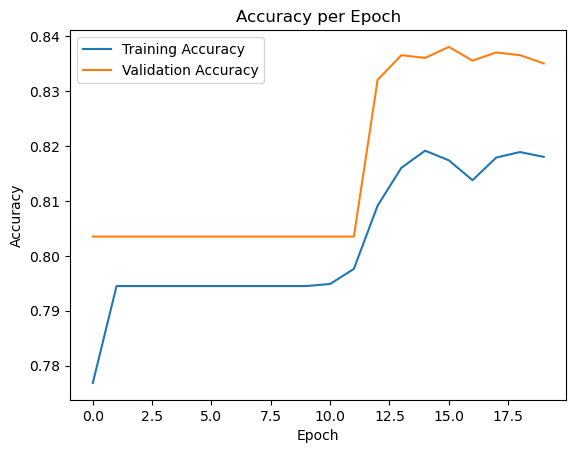

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
acc = accuracy_score(y_test, y_pred)
print("Final Accuracy: {:.2f}%".format(acc * 100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Final Accuracy: 83.50%


In [37]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1565   42]
 [ 288  105]]
